In [5]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt 
from astropy.visualization import simple_norm
from astropy.wcs import WCS 
import pyregion
from astropy.nddata import Cutout2D

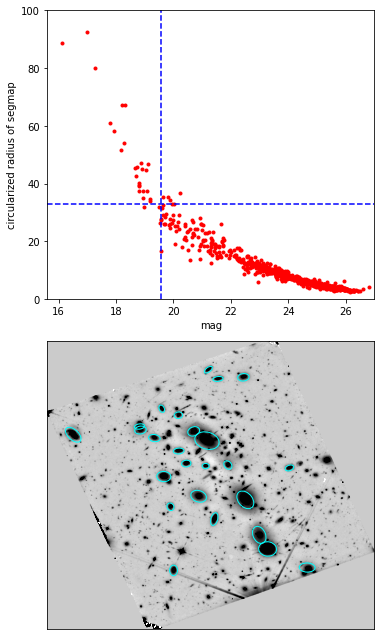

In [17]:
plt.figure(figsize =(1.2*4.5,2*4.5))
ax1=plt.subplot(211)
data=np.loadtxt('t.sex.outcat')
mag=data[:,17]
id=data[:,0].astype(np.int64)
mag_cut=np.percentile(mag,4)
seg_data=fits.open('t.sex.outseg.fits')[0].data
pix_count=[]
for i in id:
    n=len(seg_data[np.where(seg_data==i)])
    pix_count.append(n)
pix_count=np.array(pix_count)
r=np.sqrt(pix_count/3.14)
r_cut=np.percentile(r,96)
plt.plot(mag,r,'r.')
plt.plot([mag_cut,mag_cut],[0,100],'b--')
plt.plot([15.6,27],[r_cut,r_cut],'b--')
plt.ylim(0,100)
plt.xlim(15.6,27)
plt.xlabel('mag')
plt.ylabel('circularized radius of segmap')

ax2=plt.subplot(212)
data=fits.open('f160w_icl106_out.fits')[0].data
hdr=fits.open('f160w_icl106_out.fits')[0].header
exptime=hdr['exptime']
norm=simple_norm(data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax2.imshow(data/exptime,cmap='gray_r',norm=norm,origin='lower',aspect='auto')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

bcg=pyregion.open('bcg_kron.reg').as_imagecoord(hdr)
patch_list,text_list=bcg.get_mpl_patches_texts()
for p in patch_list:
    ax2.add_patch(p)
for t in text_list:
    ax2.add_artist(t)
plt.tight_layout()
plt.savefig('bcg_selection.jpg',dpi=150)

In [73]:
import numpy as np
import matplotlib.pyplot as plt 
from astropy.io import fits
from astropy.visualization import simple_norm
from astropy.nddata import Cutout2D
from astropy.wcs import WCS

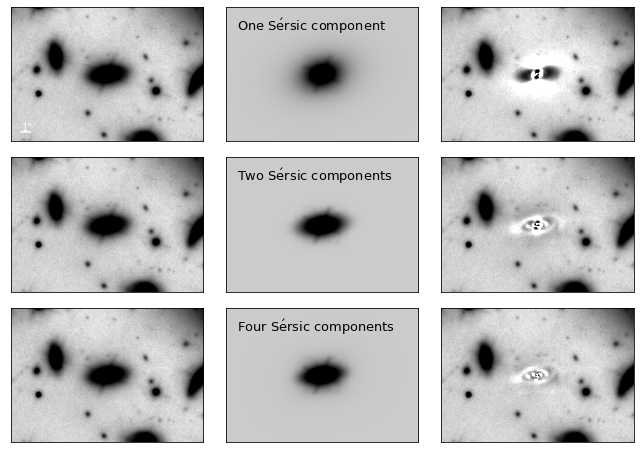

In [74]:
plt.figure(figsize =(3*3,3*2.2))
ax1=plt.subplot(331)
data=fits.open('t.593_gf.fits')[0].data/66140.96
norm=simple_norm(data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax1.imshow(data,cmap='gray_r',norm=norm,origin='lower')
ax1.plot([18,18+17],[15,15],color='w')
ax1.text(20,18,r'1"',color='w',fontsize=10)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2=plt.subplot(332)
model=fits.open('t.593_gf.fits')[4].data/66140.96
norm=simple_norm(model,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax2.imshow(model,cmap='gray_r',norm=norm,origin='lower')
ax2.text(20,200,r'One S$\'{\rm e}$rsic component',color='k',fontsize=13)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

ax3=plt.subplot(333)
residual=data-model
norm=simple_norm(residual,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax3.imshow(residual,cmap='gray_r',norm=norm,origin='lower')
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax4=plt.subplot(334)
data=fits.open('t.593_bd_gf.fits')[0].data/66140.96
norm=simple_norm(data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax4.imshow(data,cmap='gray_r',norm=norm,origin='lower')
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)

ax5=plt.subplot(335)
model1=fits.open('t.593_bd_gf.fits')[4].data/66140.96
model2=fits.open('t.593_bd_gf.fits')[5].data/66140.96
model=model1+model2
norm=simple_norm(model,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax5.imshow(model,cmap='gray_r',norm=norm,origin='lower')
ax5.text(20,200,r'Two S$\'{\rm e}$rsic components',color='k',fontsize=13)
ax5.get_xaxis().set_visible(False)
ax5.get_yaxis().set_visible(False)

ax6=plt.subplot(336)
residual=data-model
norm=simple_norm(residual,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax6.imshow(residual,cmap='gray_r',norm=norm,origin='lower')
ax6.get_xaxis().set_visible(False)
ax6.get_yaxis().set_visible(False)

ax7=plt.subplot(337)
data=fits.open('t.593_bd4_gf.fits')[0].data/66140.96
norm=simple_norm(data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax7.imshow(data,cmap='gray_r',norm=norm,origin='lower')
ax7.get_xaxis().set_visible(False)
ax7.get_yaxis().set_visible(False)

ax8=plt.subplot(338)
model1=fits.open('t.593_bd4_gf.fits')[4].data/66140.96
model2=fits.open('t.593_bd4_gf.fits')[5].data/66140.96
model3=fits.open('t.593_bd4_gf.fits')[6].data/66140.96
model4=fits.open('t.593_bd4_gf.fits')[7].data/66140.96
model=model1+model2+model3+model4
norm=simple_norm(model,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax8.imshow(model,cmap='gray_r',norm=norm,origin='lower')
ax8.text(20,200,r'Four S$\'{\rm e}$rsic components',color='k',fontsize=13)
ax8.get_xaxis().set_visible(False)
ax8.get_yaxis().set_visible(False)

ax9=plt.subplot(339)
residual=data-model
norm=simple_norm(residual,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax9.imshow(residual,cmap='gray_r',norm=norm,origin='lower')
ax9.get_xaxis().set_visible(False)
ax9.get_yaxis().set_visible(False)

plt.tight_layout(w_pad=0.001,h_pad=0.001)
plt.savefig('model_residual_fig.jpg',dpi=150)
plt.show()

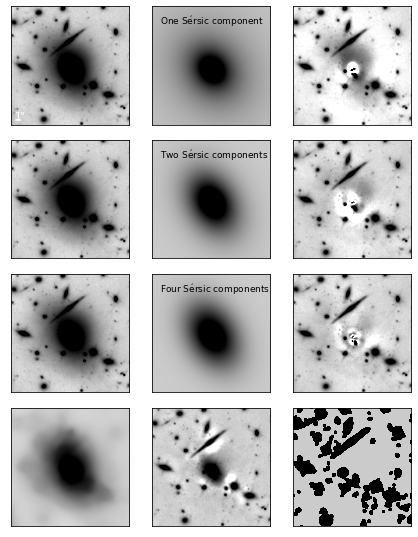

In [87]:
plt.figure(figsize =(4*1.47,3*2.58))
plt.tight_layout()
ax1=plt.subplot(431)
data=fits.open('t.93_gf.fits')[0].data/66140.96
hdr=fits.open('t.93_gf.fits')[0].header
wcs=WCS(hdr)
position=(360,420)
h=450
size=(h,h)
cutout=Cutout2D(data,position=position,size=size,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax1.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax1.plot([18,18+17],[15,15],color='w')
ax1.text(17,19,r'1"',color='w',fontsize=10)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2=plt.subplot(432)
model=fits.open('t.93_gf.fits')[4].data/66140.96
cutout=Cutout2D(model,position=position,size=size,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax2.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax2.text(30,380,r'One S$\'{\rm e}$rsic component',color='k',fontsize=9)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

ax3=plt.subplot(433)
residual=data-model
cutout=Cutout2D(residual,position=position,size=size,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax3.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax4=plt.subplot(434)
data=fits.open('t.93_bd_gf.fits')[0].data/66140.96
cutout=Cutout2D(data,position=position,size=size,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax4.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)

ax5=plt.subplot(435)
model1=fits.open('t.93_bd_gf.fits')[4].data/66140.96
model2=fits.open('t.93_bd_gf.fits')[5].data/66140.96
model=model1+model2
cutout=Cutout2D(model,position=position,size=size,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax5.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax5.text(30,380,r'Two S$\'{\rm e}$rsic components',color='k',fontsize=9)
ax5.get_xaxis().set_visible(False)
ax5.get_yaxis().set_visible(False)

ax6=plt.subplot(436)
residual=data-model
cutout=Cutout2D(residual,position=position,size=size,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax6.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax6.get_xaxis().set_visible(False)
ax6.get_yaxis().set_visible(False)

ax7=plt.subplot(437)
data=fits.open('t.93_bd_gf.fits')[0].data/66140.96
cutout=Cutout2D(data,position=position,size=size,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax7.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax7.get_xaxis().set_visible(False)
ax7.get_yaxis().set_visible(False)

ax8=plt.subplot(438)
model1=fits.open('t.93_bd4_gf.fits')[4].data/66140.96
model2=fits.open('t.93_bd4_gf.fits')[5].data/66140.96
model3=fits.open('t.93_bd4_gf.fits')[6].data/66140.96
model4=fits.open('t.93_bd4_gf.fits')[7].data/66140.96
model=model1+model2+model3+model4
cutout=Cutout2D(model,position=position,size=size,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax8.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax8.text(30,380,r'Four S$\'{\rm e}$rsic components',color='k',fontsize=9)
ax8.get_xaxis().set_visible(False)
ax8.get_yaxis().set_visible(False)

ax9=plt.subplot(439)
residual=data-model
cutout=Cutout2D(residual,position=position,size=size,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax9.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax9.get_xaxis().set_visible(False)
ax9.get_yaxis().set_visible(False)

ax10=plt.subplot(4,3,10)
smooth=fits.open('smooth93.fits')[0].data/66140.96
cutout=Cutout2D(smooth,position=position,size=size,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax10.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax10.get_xaxis().set_visible(False)
ax10.get_yaxis().set_visible(False)

ax11=plt.subplot(4,3,11)
smooth1=fits.open('93.fits')[0].data/66140.96
cutout=Cutout2D(smooth1,position=position,size=size,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax11.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax11.get_xaxis().set_visible(False)
ax11.get_yaxis().set_visible(False)

ax12=plt.subplot(4,3,12)
mask=fits.open('seg93.fits')[0].data
cutout=Cutout2D(mask,position=position,size=size,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax12.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax12.get_xaxis().set_visible(False)
ax12.get_yaxis().set_visible(False)

plt.tight_layout(w_pad=0.001,h_pad=0.001)
plt.savefig('ebcg_fig.jpg',dpi=150)
plt.show()


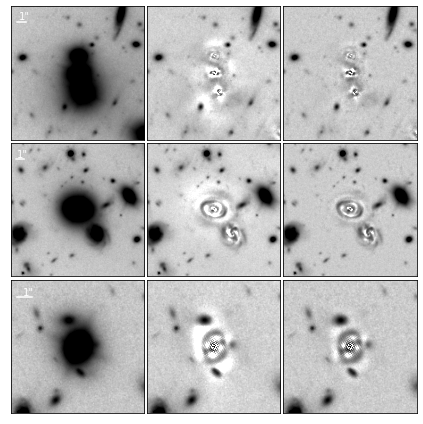

In [15]:
plt.figure(figsize =(3*2,3*2))
plt.tight_layout()
ax1=plt.subplot(331)
data=fits.open('f160w.fits')[0].data/66140.96
hdr=fits.open('f160w.fits')[0].header
wcs=WCS(hdr)
position1=(800,2045)
h1=250
size1=(h1,h1)
cutout=Cutout2D(data,position=position1,size=size1,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax1.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax1.plot([12,12+17],[221,221],color='w')
ax1.text(14,225,r'1"',color='w',fontsize=10)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2=plt.subplot(332)
residual1=fits.open('f160w_icl_bcg_out.fits')[0].data/66140.96
cutout=Cutout2D(residual1,position=position1,size=size1,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax2.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

ax3=plt.subplot(333)
residual2=fits.open('f160w_icl_bcg_out_detection.fits')[0].data/66140.96
cutout=Cutout2D(residual2,position=position1,size=size1,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax3.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax4=plt.subplot(334)
position2=(1012,1540)
h2=300
size2=(h2,h2)
cutout=Cutout2D(data,position=position2,size=size2,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax4.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax4.plot([12,12+17],[264,264],color='w')
ax4.text(14,268,r'1"',color='w',fontsize=10)
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)

ax5=plt.subplot(335)
cutout=Cutout2D(residual1,position=position2,size=size2,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax5.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax5.get_xaxis().set_visible(False)
ax5.get_yaxis().set_visible(False)

ax6=plt.subplot(336)
cutout=Cutout2D(residual2,position=position2,size=size2,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax6.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax6.get_xaxis().set_visible(False)
ax6.get_yaxis().set_visible(False)

ax7=plt.subplot(337)
position3=(1070,1235)
h3=150
size3=(h3,h3)
cutout=Cutout2D(data,position=position3,size=size3,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax7.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax7.plot([7,7+17],[130,130],color='w')
ax7.text(13,132,r'1"',color='w',fontsize=10)
ax7.get_xaxis().set_visible(False)
ax7.get_yaxis().set_visible(False)

ax8=plt.subplot(338)
cutout=Cutout2D(residual1,position=position3,size=size3,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax8.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax8.get_xaxis().set_visible(False)
ax8.get_yaxis().set_visible(False)

ax9=plt.subplot(339)
cutout=Cutout2D(residual2,position=position3,size=size3,wcs=wcs)
norm=simple_norm(cutout.data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax9.imshow(cutout.data,cmap='gray_r',norm=norm,origin='lower')
ax9.get_xaxis().set_visible(False)
ax9.get_yaxis().set_visible(False)

plt.tight_layout(w_pad=0.001,h_pad=0.001)
plt.savefig('median_filter_fig.jpg',dpi=150)
plt.show()


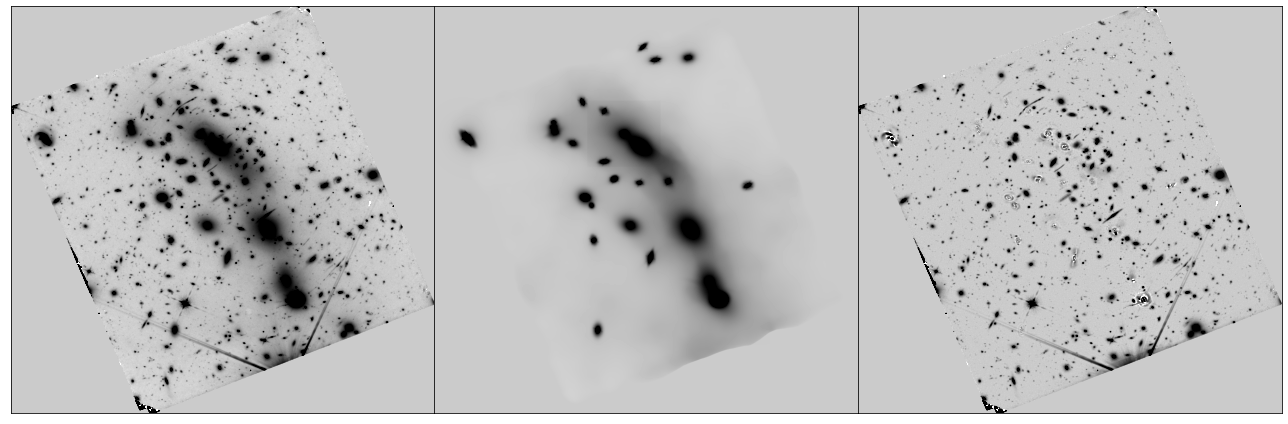

In [21]:
plt.figure(figsize =(3*6,1*6))

ax1=plt.subplot(131)
data=fits.open('f160w.fits')[0].data
hdr=fits.open('f160w.fits')[0].header
exptime=hdr['exptime']
norm=simple_norm(data,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax1.imshow(data/exptime,cmap='gray_r',norm=norm,origin='lower',aspect='auto')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2=plt.subplot(132)
model=fits.open('icl+bcg.fits')[0].data
norm=simple_norm(model,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax2.imshow(model/exptime,cmap='gray_r',norm=norm,origin='lower',aspect='auto')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

ax3=plt.subplot(133)
residual=fits.open('f160w_icl_bcg_out_detection.fits')[0].data
norm=simple_norm(residual,stretch='asinh',min_cut=-0.007,max_cut=0.1)
ax3.imshow(residual/exptime,cmap='gray_r',norm=norm,origin='lower',aspect='auto')
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

plt.tight_layout()
plt.subplots_adjust(wspace=0.0)
plt.savefig('subtract_fig.jpg',dpi=150)
plt.show()
